# Convolutional Neural Networks (CNNs)for MNIST **digit classification** problem.


In [11]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
# deep learning modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras import regularizers
# data preprocessing
from keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

## 1. Data loading and preprocessing

In this example, we use the [MNIST](https://keras.io/api/datasets/mnist/) digits classification dataset available on Keras.

The **MNIST** (**Modified National Institute of Standards and Technology**) database is a large database of handwritten digits that is commonly used for training various image processing system. It contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at [here](https://en.wikipedia.org/wiki/MNIST_database).

In [3]:
# load the dataset and split into training/testing features and labels
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# data normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# checking data structure
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


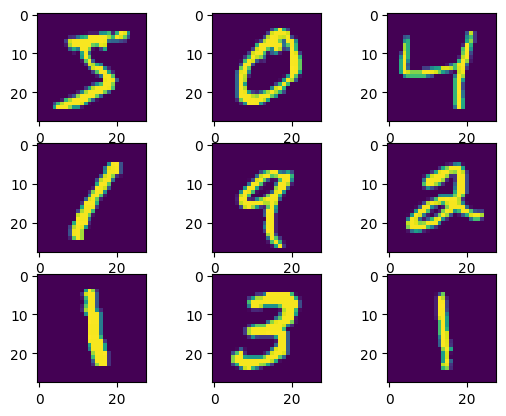

In [5]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i]) # add cmap=plt.get_cmap('gray') for greyscale
# show the figure
plt.show()

### Label enconding

In [6]:
# print first ten (integer valued) training labels
print('Integer-valued labels: ')
print(y_train[:10])

Integer-valued labels: 
[5 0 4 1 9 2 1 3 1 4]


In [7]:
# one-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#print first ten (one hot) training labels
print('One-hot labels: ')
print(y_train[:10])

One-hot labels: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---

## 2. Training hyperparameters

For simplicity, we will define some **hyperparameters for model definition and training** here.

In [8]:
# epochs of training
n_epochs = 15
# batch size (default to 32)
#batch_size_t = 128

---

## 3. CNN model



In this model, we add a **pooling layer** to **reduce the dimensions of the feature maps**. Pooling layers are used along with convolutional layers to reduce the number of parameters to learn and the amount of computation performed in the network. **The pooling layer summarises the features present in a region of the feature map generated by a convolution layer**.

In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 63050 (246.29 KB)
Trainable params: 63050 (246.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# compile and run
model.compile(optimizer='Adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2)


Epoch 1/15
1500/1500 [==============================] - 9s 4ms/step - loss: 0.2424 - accuracy: 0.9311 - val_loss: 0.1062 - val_accuracy: 0.9709
Epoch 2/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0855 - accuracy: 0.9756 - val_loss: 0.0790 - val_accuracy: 0.9768
Epoch 3/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0633 - accuracy: 0.9813 - val_loss: 0.0734 - val_accuracy: 0.9783
Epoch 4/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0525 - accuracy: 0.9843 - val_loss: 0.0715 - val_accuracy: 0.9793
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0707 - val_accuracy: 0.9811
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0719 - val_accuracy: 0.9790
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0674 - val_accuracy

Text(0.5, 0.98, 'CNN - Conv2D + MaxPooling')

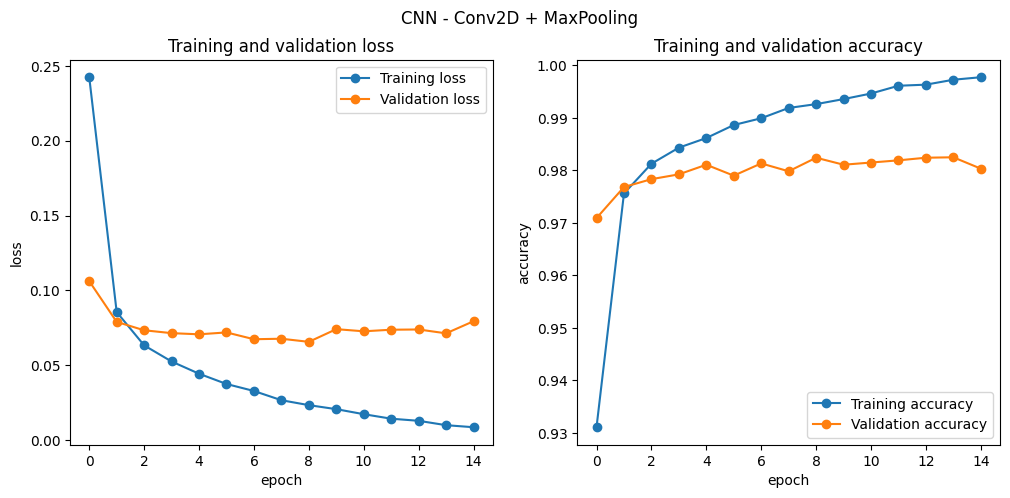

In [17]:
# training and validation loss
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history.history['loss'],'-o', label='Training loss')
ax1.plot(history.history['val_loss'],'-o', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(loc='upper right')
ax2.plot(history.history['accuracy'],'-o', label='Training accuracy')
ax2.plot(history.history['val_accuracy'],'-o', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(loc='lower right')
f.suptitle('CNN - Conv2D + MaxPooling')

In [18]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
# print test accuracy
print('Test accuracy %.2f%%' % accuracy)

Test accuracy 98.16%


---

### Other improvements

You can try a combination of model architectural parameters and training parameters to keep improving your model.

**Model improvements:**
* kernel initializer and kernel regularizer
* MaxPooling2D pool_size
* Dropout
* Batch normalization

**Training hyperparameters:**
* batch size and number of epochs
* validation split
* callbacks, including [model checkpoint](https://keras.io/api/callbacks/model_checkpoint/)

---

## 4. Model prediction

We can **pick the best model** (in our case, **model4** - but for visualisation purposed we will use model5) and use it for prediction by passing a new data instance (in this example, we simply pick on `X_test` sample).


In [19]:
from numpy import asarray
from numpy import argmax

# print options for float numbers
#np.set_printoptions(formatter={'float_kind':'{:.8f}'.format})

# make a prediction
image = x_test[102]
yhat = model.predict(asarray([image]))
print('Predicted values: ', yhat)
print('\nPredicted: class = %d' % argmax(yhat))
print('True class: ', np.argmax(y_test[102]))

1/1 [==============================] - 0s 162ms/step
Predicted values:  [[3.4288313e-23 4.4850011e-25 2.7648062e-17 2.8450714e-10 4.5892857e-21
  1.0000000e+00 9.2900587e-26 1.3888584e-18 2.4914606e-10 1.1124117e-09]]

Predicted: class = 5
True class:  5


In [20]:
predictions = model.predict(x_test)
tf.math.confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

313/313 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    1,    0,    1,    5,    0,    5,    0],
       [   0, 1126,    4,    1,    1,    0,    2,    1,    0,    0],
       [   3,    1, 1016,    2,    0,    0,    0,    6,    3,    1],
       [   0,    0,    4, 1002,    0,    2,    0,    0,    2,    0],
       [   0,    2,    0,    0,  967,    0,    3,    1,    1,    8],
       [   2,    1,    0,   13,    0,  871,    4,    0,    1,    0],
       [   5,    1,    1,    0,    4,    2,  939,    0,    6,    0],
       [   0,    4,   17,    5,    0,    0,    0, 1000,    1,    1],
       [   5,    0,    3,    2,    2,    1,    1,    3,  952,    5],
       [   0,    2,    1,    7,    8,    6,    0,    7,    1,  977]],
      dtype=int32)>


---

## 5. Model interpretability



We can iterate over all layers and get the weight and bias values. We can also check the filter values and what features were learnt.

We use our **deepest model - Model 5** for visualisation.

In [21]:
# checking all layers present in the model
for layer in model.layers:
    print(layer.name) #, layer.inbound_nodes, layer.outbound_nodes

conv2d
max_pooling2d
flatten
dense


In [22]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)


In [23]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()
print(filters.shape, biases.shape)

(3, 3, 1, 32) (32,)


In [24]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

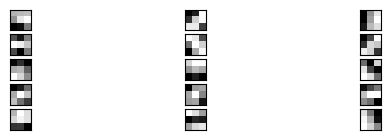

In [25]:
from matplotlib import pyplot

# plot first few filters
n_filters, ix = 15, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn off axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in greyscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

---

## Visualizing Intermediate Activations

We are first going to decide which layer’s activations do we want to visualize and build our activation model.

In [26]:
from keras.models import Model

# layer_outputs should match the number of Conv2D and MaxPooling2D blocks in the model
layer_outputs = [layer.output for layer in model.layers[0:4]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [28]:
layer_outputs

[<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 6272) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>]

In [29]:
activation_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 63050 (246.29 KB)
Trainable params: 63050 (246.29 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________

(-0.5, 27.5, 27.5, -0.5)

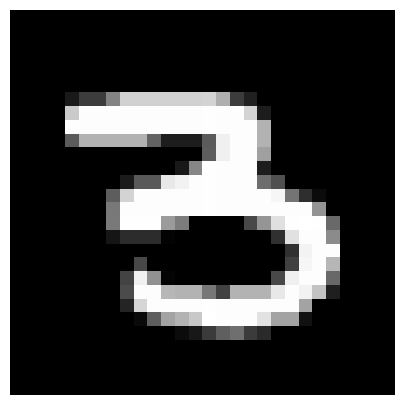

In [30]:
img = x_test[51].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

In [31]:
activations = activation_model.predict(img)

1/1 [==============================] - 0s 205ms/step


In [32]:
len(activations)

4

# Grad-CAM explainability method
This code is adapted from [this Keras tutorial](https://keras.io/examples/vision/grad_cam/).

In [34]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [35]:
def plt_images(x_test, i_max, j_max):

  fig, axs = plt.subplots(i_max, j_max, figsize=plt.figaspect(0.5))
  for i in range(i_max):
    for j in range(j_max):
      ind = np.arange(i_max*j_max)[i*j_max+j]
      img = x_test[ind].reshape(1,28,28,1)
      axs[i, j].imshow(img[0,:,:,0], aspect='auto')

  return

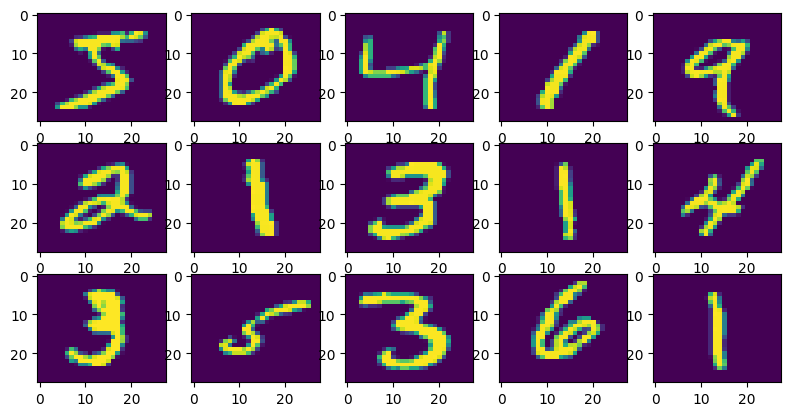

In [36]:
i_max = 3
j_max = 5
plt_images(x_train, i_max, j_max)

In [37]:
def plot_gradcam_images(i_max, j_max, x_test, model, layer_name):
  fig, axs = plt.subplots(i_max, j_max, figsize=plt.figaspect(0.5))
  for i in range(i_max):
    for j in range(j_max):
      ind = np.arange(i_max*j_max)[i*j_max+j]
      heatmap = make_gradcam_heatmap(tf.expand_dims(x_test[ind], axis=0), model, layer_name)
      axs[i, j].matshow(heatmap, aspect='auto')
  plt.tight_layout()
  plt.show()
  return

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 63050 (246.29 KB)
Trainable params: 63050 (246.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


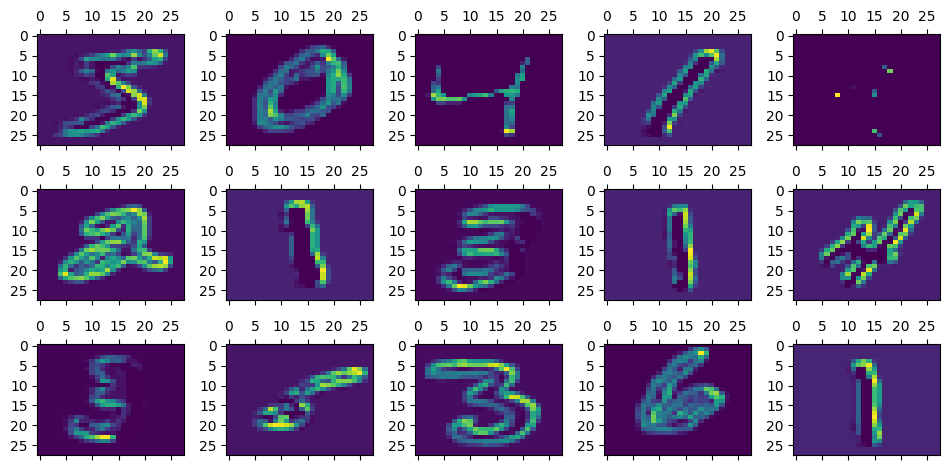

In [39]:
plot_gradcam_images(i_max, j_max, x_train, model, 'conv2d')

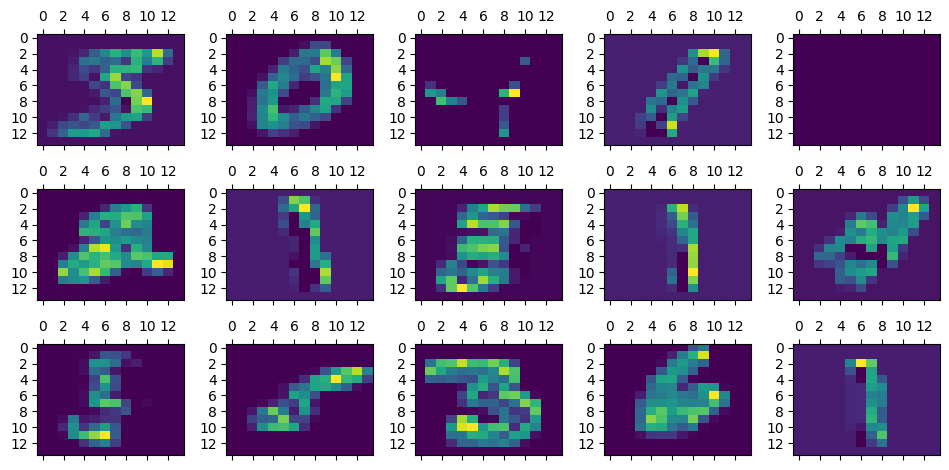

In [40]:
plot_gradcam_images(i_max, j_max, x_train, model, 'max_pooling2d')